In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Read in the data
titanic = pd.read_csv('../data/titanic.csv')

In [4]:
# Take a  selection of the variables
d = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [5]:
# Check for missing values in all columns
#d.isnull().sum()
d.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.isnull().sum()) / d.groupby(['Sex', 'Pclass']).Age.count()

Sex     Pclass
female  1         0.105882
        2         0.027027
        3         0.411765
male    1         0.207921
        2         0.090909
        3         0.371542
Name: Age, dtype: float64

In [6]:
# Convert all variables to numeric for scikit learn
d['Sex'] = np.where(d.Sex == 'female', 1, 0)

/Users/Hunter/ipykernel/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
# Fill in missing values with the mean value (hint: use .fillna())
d['Age'] = d['Age'].fillna(d['Age'].mean())

/Users/Hunter/ipykernel/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
# Explore the data to identify trends in characteristics of survivors
# Explore the data to indtify trends in characteristics of survivors
#d.Survived.value_counts()                    # How many people lived and died
#d.Survived.mean()                            # The survival rate for everyone
#d.groupby('Sex').Survived.mean()             # By Sex: women have higher survival rates
#d.groupby('Pclass').Survived.mean()          # By Pclass: 1st class passengers have higher survival rates
d.groupby(['Sex', 'Pclass']).Survived.mean() # By Sex and Pclass: Women in the 1st and 2nd classes had the highest survival rates

Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.135447
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64

In [9]:
# Create a proxy variable representing whether the Spouse was on board
d['Spouse'] = ((d.Age > 18) & (d.SibSp >= 1)).astype(int)
#d.Spouse.value_counts()
#d.groupby(['Pclass', 'Spouse']).Survived.mean() # Having a spouse appears to increase survival in the 1st class only

/Users/Hunter/ipykernel/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
'''
Split into training and test datasets, and build the model
'''

In [ ]:
# create feature vector and response variable (y = Survived)

In [10]:
survived = d['Survived']
del d['Survived']


In [11]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(d,survived, random_state=1)

In [12]:
# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

In [13]:
# Fit the decision tree classifier
ctree.fit(X_train, y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [35]:
# Make predictions on the test set
preds = ctree.predict(X_test)

preds

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [36]:
# Calculate accuracy
metrics.accuracy_score(y_test, preds)

0.726457399103139

In [37]:
# Confusion matrix
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])


predicted,0,1
actual,,
0,119,9
1,52,43


In [38]:
# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)[:,1]

In [39]:
# Calculate the AUC metric
metrics.roc_auc_score(y_test, probs)

0.77874177631578934

In [ ]:
# Decision Trees have notorouisly high variance, so what can we do
# to better estimate the out of sample error of a high variance model?


In [ ]:
# cross validation

In [26]:
# compare AUC using cross-validation


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# compare AUC using cross-validation
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(ctree, d, survived, cv=10, scoring='roc_auc').mean()

0.80183585151232217

In [42]:
# Import the naive bayes and KNN modules and calculate an ROC/AUC score for
# each one
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
from sklearn.neighbors import KNeighborsClassifier  # import class
knn = KNeighborsClassifier(n_neighbors=5)           # instantiate the estimator

print cross_val_score(nb, d, survived, cv=10, scoring='roc_auc').mean()
print cross_val_score(knn, d, survived, cv=10, scoring='roc_auc').mean()



0.809984452367
0.817873157344


In [ ]:
'''
Fine tuning the tree

'''

In [44]:
# check CV score for max depth = 3
# check CV score for max depth = 3
ctree = tree.DecisionTreeClassifier(max_depth=3)
print np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))

# check CV score for max depth = 10
ctree = tree.DecisionTreeClassifier(max_depth=10)
print np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))

0.837955748859
0.812106886813


In [ ]:
# check CV score for max depth = 10


In [ ]:
# Conduct a grid search for the best tree depth


In [ ]:
# Check out the scores of the grid search


In [ ]:
# Plot the results of the grid search


In [ ]:
# Get the best estimator


In [ ]:
''' Use Grid Search try scan over three parameters
1. max_depth:     from 1 to 20
2. criterion:     (either 'gini' or 'entropy')
3. max_features : range (1,5)
'''

In [14]:
# Conduct a grid search for the best tree depth
# Conduct a grid search for the best tree depth

from sklearn.grid_search import GridSearchCV

ctree = tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(d, survived)

GridSearchCV(cv=5,
       estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [48]:
# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]
print grid_mean_scores

[0.7667925598469747, 0.80689941071126869, 0.83786211589817217, 0.84029998803624339, 0.84706255709115552, 0.84125878490649419, 0.83736753470763248, 0.82838190186339677, 0.81725148769243483, 0.81435497955893843, 0.79737419764651885, 0.7929269527025874, 0.78622978057912007, 0.78713153320646867, 0.78754057193287719, 0.78451721616631698, 0.78609617365216944, 0.78597762093215462, 0.78517032383588081]


In [50]:
# Get the best estimator
best = grid.best_estimator_
print best

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


AttributeError: 'function' object has no attribute 'best_params_'

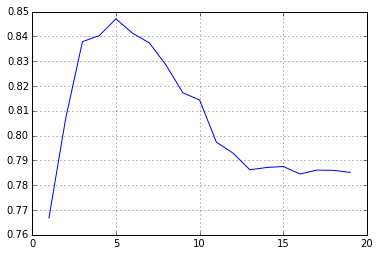

In [52]:
# Plot the results of the grid search
%pylab inline
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [16]:
# Conduct a grid search for the best tree depth
ctree = tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
criterion_range = ['gini', 'entropy']
max_feaure_range = range(1,5)
param_grid = dict(max_depth=depth_range, criterion=criterion_range, max_features=max_feaure_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(d, survived)

GridSearchCV(cv=5,
       estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [17]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]


In [19]:
best = grid.best_estimator_
print best

DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=6, max_features=3, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')


In [24]:
print max(grid_mean_scores)

0.848289521231


In [ ]:

'''
calculate a cross-validated roc_auc score for the model and compare to 
# base logistic regression
'''

In [ ]:
'''

Decision trees (like many other classification models)
can also be used for regression!

'''

In [28]:
print cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
print cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()

0.854433056051
0.853902342755


In [30]:
drinks = pd.read_csv('../data/drinks.csv', na_filter=False)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
# Make dummy columns for each of the 6 regions

In [31]:
# Make dummy columns for each of the 6 regions
for continent_ in ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']:
    drinks[continent_] = drinks['continent'] == continent_

In [32]:
del drinks['continent']
del drinks['country']
del drinks['total_litres_of_pure_alcohol']

In [33]:
X = drinks.drop('wine_servings', axis=1)
y = drinks['wine_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [34]:
rtree = tree.DecisionTreeRegressor()

rtree.fit(X_train, y_train)
rtree.predict(X_test)

array([ 339.,    2.,    1.,    7.,    4.,    5.,    1.,  175.,  123.,
          0.,    1.,    1.,    3.,  175.,   24.,  370.,   19.,  221.,
          1.,    1.,   13.,    1.,    0.,   16.,    2.,    0.,   13.,
        123.,    1.,    8.,   13.,    0.,    2.,    0.,    1.,    5.,
          1.,    1.,  120.,    0.,    5.,   28.,   51.,  167.,    1.,
          0.,    5.,    1.,  339.])

In [35]:
scores = cross_val_score(rtree, X, y, cv=10, scoring='mean_squared_error')
mse_scores = -scores
mse_scores


array([ 7419.75      ,  6865.55      ,  7560.25      ,  9386.10526316,
        3075.94736842,  3246.36842105,  7777.36842105,  3780.94736842,
        5018.94736842,  2669.47368421])

In [36]:
rmse_scores = np.sqrt(mse_scores)
rmse_scores
rmse_scores.mean()

73.745660994384835

In [37]:
wine_mean = y.mean()
wine_mean

49.450777202072537

In [38]:
features = X.columns
pd.DataFrame(zip(features, rtree.feature_importances_)).sort_index(by=1, ascending=False)

,0,1
0,beer_servings,0.440238
4,EU,0.342597
1,spirit_servings,0.160045
6,SA,0.030401
7,OC,0.019964
5,AF,0.005720
2,AS,0.000596
3,NA,0.000440
